# AIM :- Document Clustering

Subtask:-
    1. Understand k means clustering
    2. Represent your corpus in TF-IDF vector form.
    3. Apply k means clustering algorithm on document vectors, and form clusters among them.
    4. Use cosine similarity to calculate distance between two vectors.

# Packages Used

In [ ]:
# Importing necessary libraries

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans

# Importing data from jason file

In [ ]:
df = pd.read_json('Department of Justice 2009-2018 Press Releases.json', lines=True)
df.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13087 entries, 0 to 13086
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12810 non-null  object
 1   title       13087 non-null  object
 2   contents    13087 non-null  object
 3   date        13087 non-null  object
 4   topics      13087 non-null  object
 5   components  13087 non-null  object
dtypes: object(6)
memory usage: 613.6+ KB


# Data Pre-processing

In [ ]:
def toLower(sentence):
    return sentence.lower()

def tokenizer(sentence):
    tokens = list(set(nltk.word_tokenize(sentence)))
    return tokens

def stopwords_removal(tokens):
    stop_words = nltk.corpus.stopwords.words('english')
    stop_words.extend([',','?','""',"''",'.','!', "'",'"',"'d","'ll",'[',']','--',':',';','///','@', '``',
                       '#', '$', '%', '&', "'re", "'s", '(', ')', '*', '**', '**the', '-', '/', '//',
                       '§', '§§','...','–', '—', '‘', '’', '“', '”', '•', '─',"'m", "'ve", '***'])
    filtered_tokens = [i for i in tokens if not i in stop_words]
    return filtered_tokens

def stemming(tokens):
    stemmer = nltk.stem.porter.PorterStemmer()
    stemmed_tokens = [stemmer.stem(i) for i in tokens]
    return stemmed_tokens

def pre_process(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    tokens = stopwords_removal(tokens)
    stems = stemming(tokens)
    return stems

# Creating TF-IDF vector

In [ ]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_features=15000,min_df = 5,max_df = 0.95,tokenizer=pre_process)

tfidf_matrix = tfidf_vectorizer.fit_transform(df.contents[:10000]) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

(10000, 14604)


In [ ]:
terms = tfidf_vectorizer.get_feature_names()
print(terms[5000:5100])

['episod', 'epithet', 'epp', 'epstein', 'equal', 'equip', 'equit', 'equiti', 'equival', 'era', 'erad', 'eras', 'ercol', 'erect', 'erez', 'eri', 'eric', 'erica', 'erich', 'erick', 'erik', 'erika', 'erin', 'ernest', 'ernesto', 'ernst', 'erod', 'eros', 'err', 'errin', 'erron', 'error', 'ervin', 'es', 'esa', 'escal', 'escalad', 'escap', 'escobar', 'escort', 'escrow', 'especi', 'espinoza', 'espionag', 'espous', 'esq.', 'esqueda', 'esquenazi', 'essenc', 'essenti', 'essex', 'est', 'establish', 'estado', 'estat', 'estate-rel', 'esther', 'estim', 'estonia', 'estrada', 'estrang', 'estuari', 'et', 'etan', 'etc', 'etc.', 'etc.complaint', 'ethan', 'ethic', 'ethiopia', 'ethiopian', 'ethnic', 'etr', 'etrac', 'etting', 'eu', 'eu-u.s.', 'eugen', 'eugenia', 'eurasian', 'eurica', 'euro', 'eurojust', 'europ', 'european', 'europol', 'eva', 'evacu', 'evad', 'evalu', 'evan', 'evansvil', 'evas', 'evasion.', 'eve', 'evelyn', 'even', 'evenli', 'event', 'eventu']


# Implementing ELBOW METHOD

Text(0.5, 1.0, 'The elbow method')

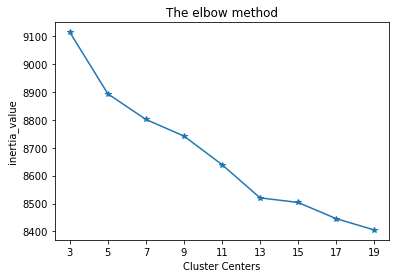

In [ ]:
# the elbow method

inertia_value = []
for k in range(3,20,2):
    inertia_value.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(tfidf_matrix).inertia_)
f, ax = plt.subplots(1, 1)
ax.plot(range(3,20,2), inertia_value, marker='*')
ax.set_xlabel('Cluster Centers')
ax.set_xticks(range(3,20,2))
ax.set_xticklabels(range(3,20,2))
ax.set_ylabel('inertia_value')
ax.set_title('The elbow method')

In [ ]:
clusters = MiniBatchKMeans(n_clusters=13, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf_matrix)

# Fetching fisrt 15 elements of each corpus

In [ ]:
df = pd.DataFrame(tfidf_matrix.todense()).groupby(clusters).mean()
wc=[]
for i,r in df.iterrows():
    print('\nCluster {}'.format(i+1))
    print(','.join([terms[t] for t in np.argsort(r)[-15:]]))
    wc.append([terms[t] for t in np.argsort(r)[-15:]])


Cluster 1
islam,citi,exercis,freedom,civil,township,religion,accommod,zone,land,right,worship,discrimin,rluipa,religi

Cluster 2
settlement,alleg,race,act,tenant,civil,lawsuit,apart,right,famili,hud,disabl,discrimin,fair,hous

Cluster 3
program,medicaid,home,strike,beneficiari,servic,claim,bill,hhs-oig,patient,medic,fraud,care,health,medicar

Cluster 4
pay,investig,indict,sentenc,prepar,revenu,divis,year,attorney,file,fals,incom,return,ir,tax

Cluster 5
enforc,assist,crime,charg,state,district,justic,civil,victim,law,u.s.,polic,offic,right,attorney

Cluster 6
reemploy,hotlin,civil,vii,statu,immigr,anti-discrimin,citizenship,worker,ina,right,userra,osc,discrimin,employ

Cluster 7
assist,settlement,state,divis,contract,offic,investig,charg,district,antitrust,crimin,attorney,compani,fraud,u.s.

Cluster 8
fraudul,fals,file,check,attorney,u.s.,stolen,return,account,bank,theft,ir,refund,ident,tax

Cluster 9
accommod,ensur,pca,requir,equal,settlement,counti,individu,peopl,civic,right,agreeme

# Visulizing the cluster using word-cloud

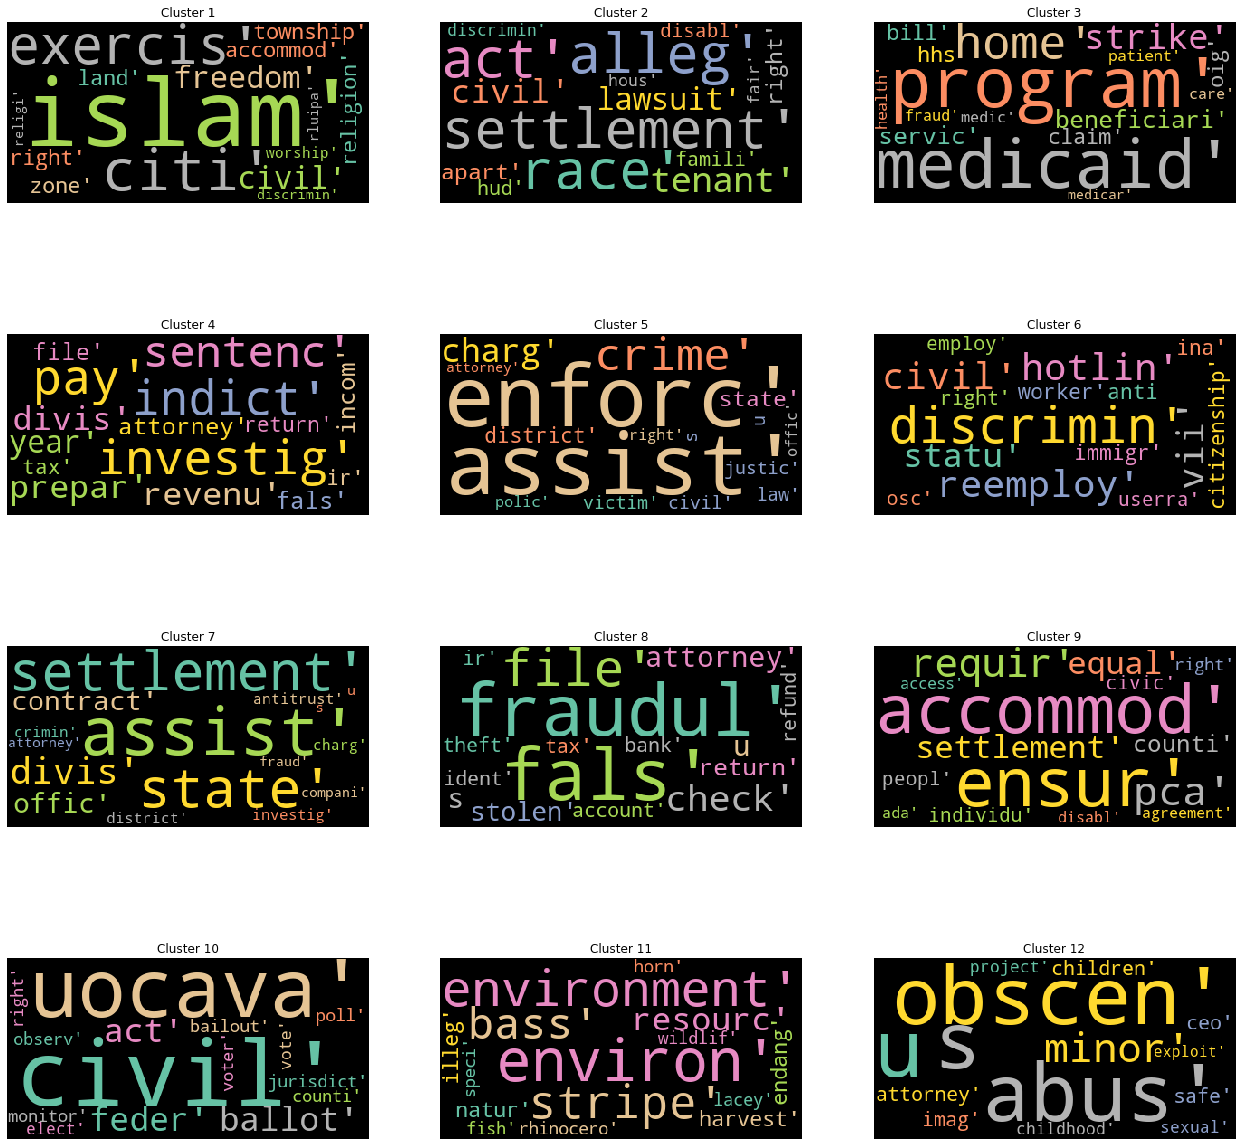

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(22,22))

for i in range(a):
    plt.subplot(a, b, c)
    wordcloud = WordCloud(background_color ='black', min_font_size = 15,colormap='Set2').generate(str(wc[i*b]))
    plt.imshow(wordcloud)
    plt.title('Cluster {}'.format(i*b+1))
    plt.axis("off")
    c = c + 1

    plt.subplot(a, b, c)
    wordcloud = WordCloud(background_color ='black', min_font_size = 15,colormap='Set2').generate(str(wc[i*b+1]))
    plt.imshow(wordcloud)
    plt.title('Cluster {}'.format(i*b+2))
    plt.axis("off")
    c = c + 1

    plt.subplot(a, b, c)
    wordcloud = WordCloud(background_color ='black', min_font_size = 15,colormap='Set2').generate(str(wc[i*b+2]))
    plt.imshow(wordcloud)
    plt.title('Cluster {}'.format(i*b+3))
    plt.axis("off")
    c = c + 1

plt.show()

# Finding Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(df,df)

In [ ]:
df = pd.DataFrame(sim)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.278168,0.098619,0.100982,0.289638,0.285730,0.222491,0.101813,0.202904,0.174236,0.114186,0.079214,0.078982
1,0.278168,1.000000,0.118789,0.118366,0.310085,0.305398,0.272443,0.116311,0.312190,0.184629,0.132110,0.121386,0.092114
2,0.098619,0.118789,1.000000,0.233717,0.354377,0.133605,0.462206,0.258516,0.154887,0.096711,0.172879,0.155909,0.127565
3,0.100982,0.118366,0.233717,1.000000,0.353927,0.163309,0.452207,0.775135,0.112278,0.099134,0.196378,0.177212,0.728502
4,0.289638,0.310085,0.354377,0.353927,1.000000,0.350899,0.706425,0.392668,0.294788,0.289340,0.370374,0.391447,0.167493
5,0.285730,0.305398,0.133605,0.163309,0.350899,1.000000,0.307462,0.138601,0.252007,0.226876,0.138740,0.109798,0.108236
6,0.222491,0.272443,0.462206,0.452207,0.706425,0.307462,1.000000,0.490837,0.260117,0.224561,0.409795,0.322565,0.245532
7,0.101813,0.116311,0.258516,0.775135,0.392668,0.138601,0.490837,1.000000,0.121331,0.106092,0.202830,0.198759,0.539117
8,0.202904,0.312190,0.154887,0.112278,0.294788,0.252007,0.260117,0.121331,1.000000,0.202225,0.117522,0.118307,0.078248
9,0.174236,0.184629,0.096711,0.099134,0.289340,0.226876,0.224561,0.106092,0.202225,1.000000,0.106978,0.092822,0.071714


# Learning Outcomes

1. Get to know the practical implementation of K-Means Clustering in text data
2. Get to know the importnace of the filtering process for the corpus and methodology
3. Get to know what is cosine similarity,term frquency,tf-idf and their pros&cons.